In [2]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import rasterio
from rasterio.mask import mask
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from shapely.geometry import shape
from rasterio.features import geometry_mask
import statsmodels.api

In [3]:
#Q1
path = os.path.join(os.getcwd(),'counties.geojson')

counties = gpd.read_file(path)
num_counties = len(counties)
num_counties

72

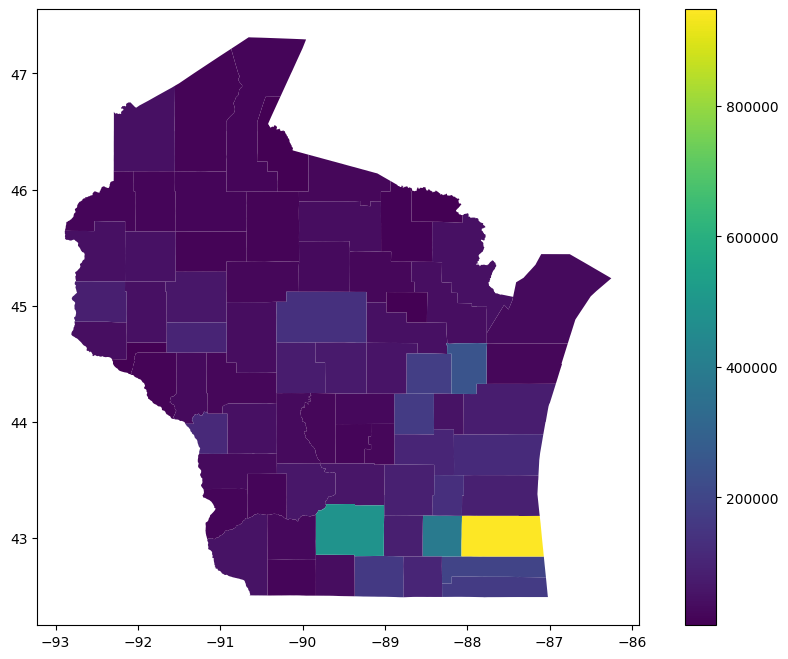

In [4]:
#Q2
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
counties.plot(column='POP100', ax=ax, legend=True)
plt.show()

In [5]:
counties_tracts_path = os.path.join(os.getcwd(),'counties_tracts.db')
conn = sqlite3.connect(counties_tracts_path)
query = "SELECT NAME, AREALAND FROM counties"
data = pd.read_sql(query, conn)
counties = counties.merge(data, how='left', on='NAME')
conn.close()

In [6]:
features = counties[['AREALAND']]

target = counties['POP100']

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.25, random_state=250)

In [7]:
#Q3
test_county_names = counties.loc[test_features.index, 'NAME'].tolist()
test_county_names

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [8]:
#Q4
model = LinearRegression()

model.fit(train_features, train_target)

score = model.score(test_features, test_target)
score

0.016720430179409274

In [9]:
#Q5
array = [[400 * 2590000]]
model.predict(array)[0]

/home/pauls/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90000.07422783462

In [10]:
#Q6
counties_tracts_path = os.path.join(os.getcwd(),'counties_tracts.db')
conn = sqlite3.connect(counties_tracts_path)

query1 = """
    SELECT COUNTY, SUM(HU100) AS housing_units_sum
    FROM tracts
    GROUP BY COUNTY
        """
housing = pd.read_sql(query1, conn)

query2 = """
    SELECT COUNTY, NAME
    FROM COUNTIES
    """
temp = pd.read_sql(query2, conn)

conn.close()

housing = housing.merge(temp, how='left', on='COUNTY')
counties = counties.merge(housing, how='left', on='NAME')

train_counties, test_counties = train_test_split(counties, test_size=0.25, random_state=250)

testcountylist = []
for county in test_counties['NAME']:
    testcountylist.append(county)
testcountylist

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [11]:
#Q7
hu100_dict = test_counties.set_index('NAME')['housing_units_sum'].to_dict()
hu100_dict

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [12]:
#Q8

model = LinearRegression()
x_train = train_counties[['housing_units_sum']]
y_train = train_counties['POP100']

cross_val_scores = cross_val_score(model, x_train, y_train, cv=5)
cross_val_scores.mean()

0.9739348181232653

In [13]:
#Q9
np.sqrt(np.var(cross_val_scores))

0.01693954236334351

In [14]:
#Q10
model.fit(x_train,y_train)
a = round(model.coef_[0], 2)
c = round(model.intercept_,2)
answer = 'POP100 = ' + str(a) + '*HU100 + ' + str(c)
answer


'POP100 = 2.47*HU100 + -9276.89'

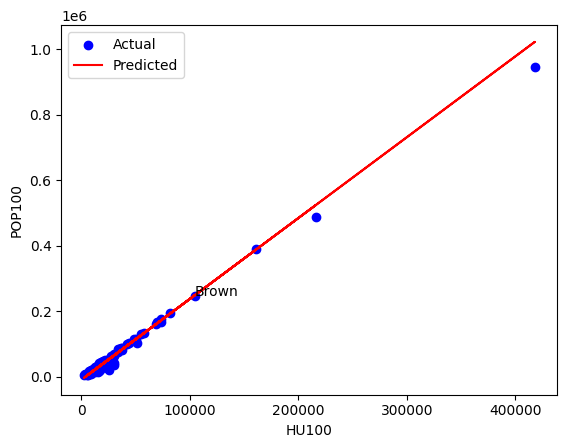

In [15]:
#Q11
features = counties[['housing_units_sum']]

predicted_population = model.predict(features)
plt.scatter(counties['housing_units_sum'], counties['POP100'], label='Actual', color='blue')
plt.plot(features, predicted_population, label='Predicted', color = 'red')

brown_county = counties.loc[counties['NAME'] == 'Brown County']
plt.text(brown_county['housing_units_sum'], brown_county['POP100'], 'Brown')

plt.xlabel('HU100')
plt.ylabel('POP100')

plt.legend()
plt.show()

In [16]:
#Q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

((A >=3) & (A<=6)).astype(int).sum()


8

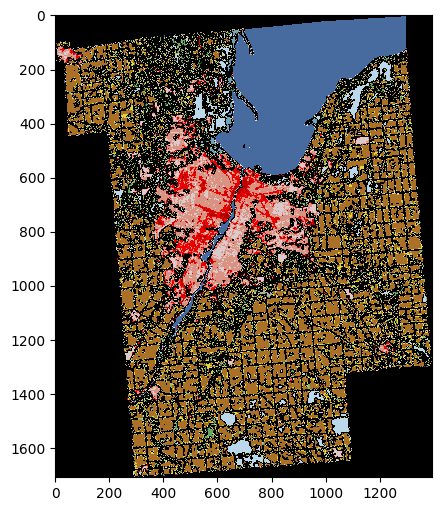

In [17]:
#Q13
c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)
land = rasterio.open("zip://../p6/land.zip!wi.tif")
brown_county = counties[counties['NAME'] == 'Brown County']
matrix, _ = mask(land, brown_county.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255,cmap=custom_cmap)

In [18]:
#Q14
matrix, _ = mask(land, brown_county.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]
open_water_mask = (matrix == 11)
brown_county_mask = (matrix != 0)

open_water_mask.astype(int).sum() /brown_county_mask.astype(int).sum()

0.13797526789725206

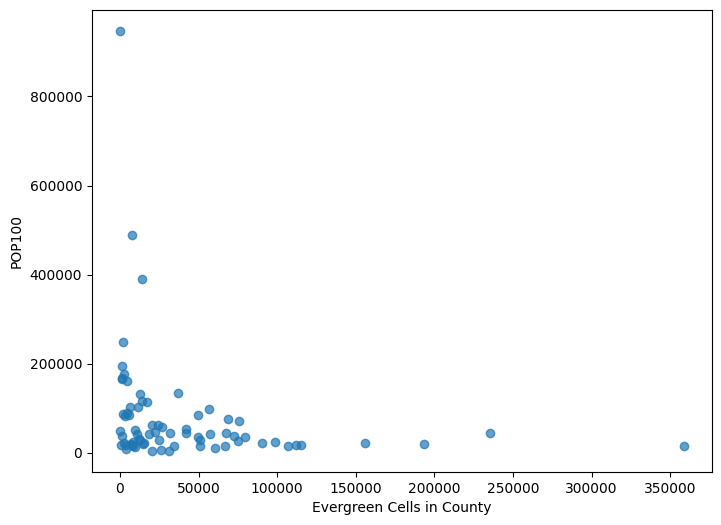

In [19]:
#Q15
countlist = []
for county in counties['NAME']:
    realcounty = counties[counties['NAME'] == county]
    matrix, _ = mask(land, realcounty.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    countlist.append((matrix==42).astype(int).sum())
countlist
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(countlist, counties['POP100'], alpha=0.7)
ax.set_xlabel('Evergreen Cells in County')
ax.set_ylabel('POP100')
plt.show()

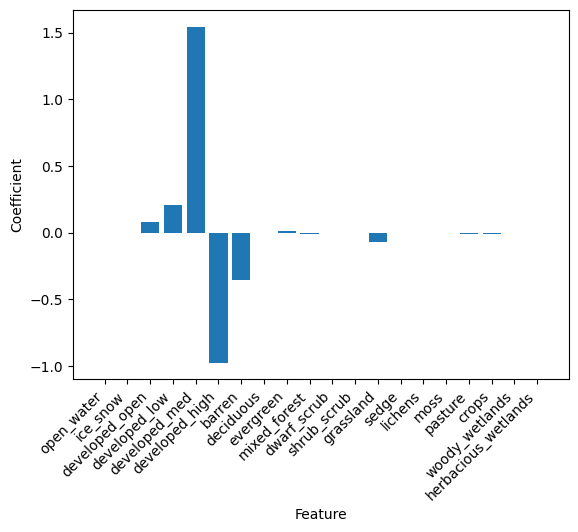

In [20]:
#Q16
tracts_gdf = gpd.read_file('../p6/tracts.shp')
land = rasterio.open("zip://../p6/land.zip!wi.tif")

land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

for i in range(len(tracts_gdf)):
    tract = tracts_gdf.iloc[i:i+1]
    matrix, _ = mask(land, tract.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    for land_type, land_code in land_use.items():
        count = (matrix == land_code).astype(int).sum()
        tracts_gdf.at[i, land_type] = count

train_gdf, test_gdf = train_test_split(tracts_gdf, test_size=0.20, random_state=300)

exclude_columns = ['POP100', 'geometry', 'GEOID']
x_train = train_gdf.drop(exclude_columns, axis=1)  
y_train = train_gdf['POP100'] 

x_test = test_gdf.drop(exclude_columns, axis=1) 
y_test = test_gdf['POP100']


model = LinearRegression()
model.fit(x_train, y_train)

#this model can show me how much each feature is correlated with the POP100 data by examining the size of the coefficient. 

feature_names = x_train.columns
coefficients = model.coef_
plt.bar(feature_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [21]:
#Q17

x_train = train_gdf[['developed_high','developed_med', 'barren', 'developed_low','developed_open','grassland']]  
y_train = train_gdf['POP100'] 

x_test = test_gdf[['developed_high','developed_med', 'barren', 'developed_low','developed_open','grassland']]  
y_test = test_gdf['POP100']

model_1= LinearRegression()
model_1.fit(x_train, y_train)
scores_model_1 = cross_val_score(model_1, x_test, y_test)

x_train = train_gdf[['developed_high','developed_med']]  
y_train = train_gdf['POP100'] 

x_test = test_gdf[['developed_high','developed_med']]  
y_test = test_gdf['POP100']

model_2= LinearRegression()
model_2.fit(x_train, y_train)
scores_model_2 = cross_val_score(model_2, x_test, y_test)

#The mean of model_2 is slightly higher, with model_1 having a mean of 0.3739 and model_2 having a mean of 0.3786. 
#Additionally, model_2 has a lower variance at .00193 as compared to model_1 at 0.00205.
#Since model_2 achieves a higher mean and a lower variance with a simpler model, and therefore less prone to overfitting, I believe that this is the most accurate model to use for this prediction task.

model_2.fit(tracts_gdf[['developed_high','developed_med']],tracts_gdf['POP100'])
model_2.score(x_test,y_test)

0.3928951533929125